In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# 한글 폰트와 글자 크기 지정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 11.0

# 마이너스 폰트
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# 데이타프레임명.plot(kind=그래프형태, figsize=(가로,세로), title=제목 , subplots=True, layout(행수, 열수))

data = {'kor':[40, 55, 66, 77, 34],
        'math':[70, 55, 66, 20, 40],
        'eng':[80, 95, 100, 77, 90],
        'sci':[90, 45, 77, 90, 67]}
name_list = ['고길동','김희동','신윤지','이민호','박준희']
df = pd.DataFrame(data, index=name_list)
df

,kor,math,eng,sci
고길동,40,70,80,90
김희동,55,55,95,45
신윤지,66,66,100,77
이민호,77,20,77,90
박준희,34,40,90,67


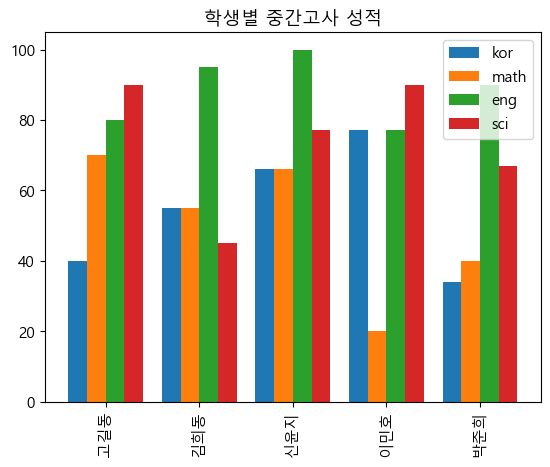

In [15]:
df.plot(kind='bar', width=0.8, title='학생별 중간고사 성적')
plt.savefig('output/DF_Bar_Graph.png')
plt.show()

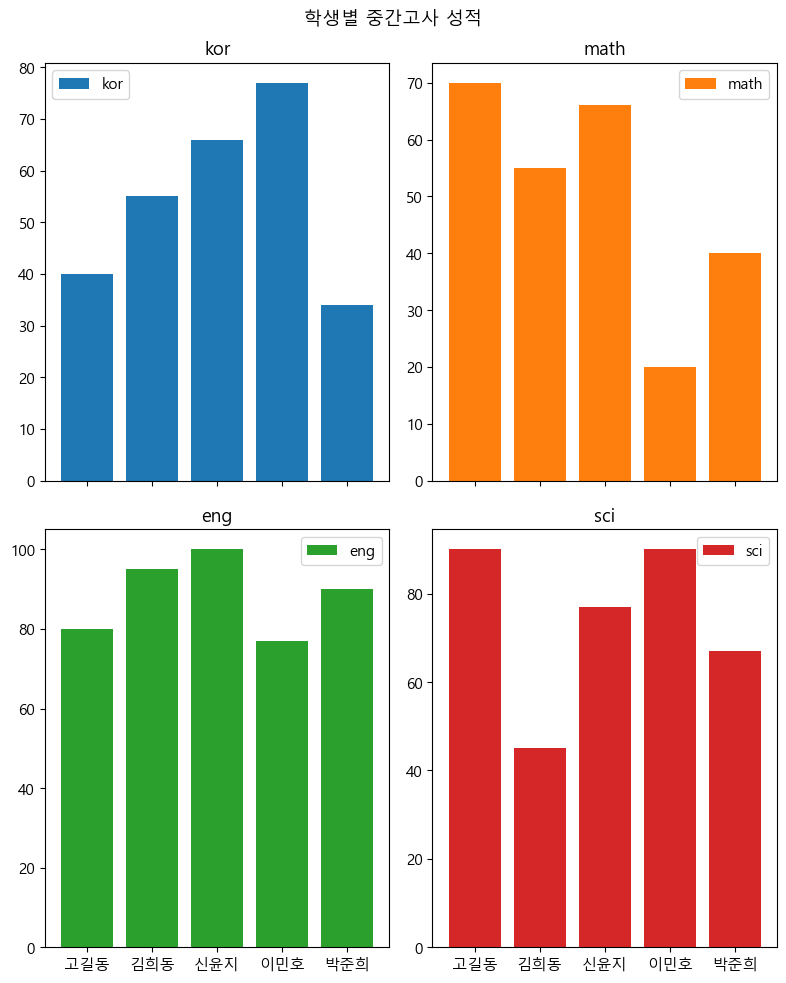

In [29]:
df.plot(kind='bar',figsize=(8,10), width=0.8, title='학생별 중간고사 성적', subplots=True, layout=(2,2), rot=0)
# plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('output/DF_Bar_Graph.png')
plt.show()

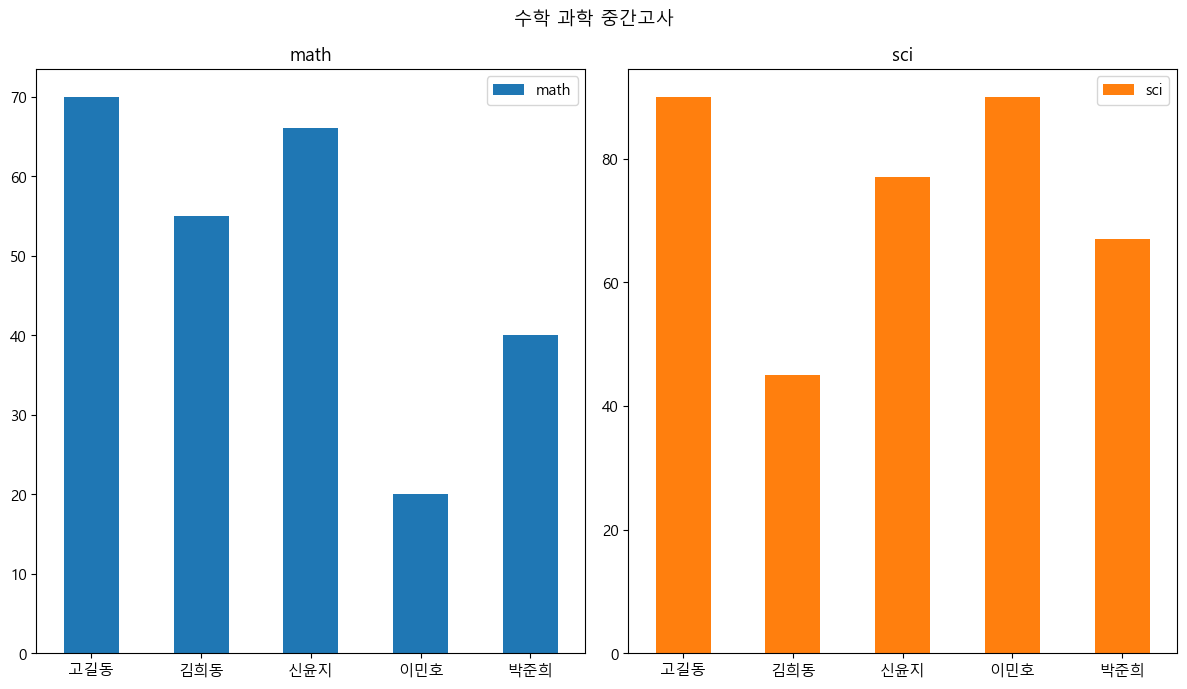

In [28]:
# 수학, 과학 성적만 1행 2열로 배치
df[['math', 'sci']].plot(kind='bar', figsize=(12,7), 
        title='수학 과학 중간고사', 
        subplots=True, layout=(1,2), rot=0)
plt.tight_layout()
plt.savefig('output/데이타프레임막대그래프3.png')
plt.show()

In [33]:
# 서울의 온도
df_weather = pd.read_csv('data/seoul.csv', encoding='cp949')
df_weather.shape
df_weather.head()
df_weather.info() # 결측값이 있는 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40221 entries, 0 to 40220
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       40221 non-null  object 
 1   지점       40221 non-null  int64  
 2   평균기온(℃)  39465 non-null  float64
 3   최저기온(℃)  39464 non-null  float64
 4   최고기온(℃)  39463 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ MB


In [36]:
df_weather.isnull().sum()
# df_weather.isnull()

날짜           0
지점           0
평균기온(℃)    756
최저기온(℃)    757
최고기온(℃)    758
dtype: int64

In [40]:
df_weather[df_weather['최저기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16428,1953-11-27,108,NaN,NaN,NaN
16429,1953-11-28,108,NaN,NaN,NaN
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN


In [45]:
df_weather['날짜'].unique()
# 특정 날짜(몇년도, 몇월 등)로 데이터를 뽑기 위해 시계열 데이터로 변환 필요

df_weather['날짜'] = pd.to_datetime(df_weather['날짜']) # 시계열 데이터(to_datetime())
df_weather['날짜'].unique()

array(['1907-10-01T00:00:00.000000000', '1907-10-02T00:00:00.000000000',
       '1907-10-03T00:00:00.000000000', ...,
       '2019-01-15T00:00:00.000000000', '2019-01-16T00:00:00.000000000',
       '2019-01-17T00:00:00.000000000'], dtype='datetime64[ns]')

In [47]:
# 날짜 컬럼을 인덱스로 설정
# df_weather.set_index('날짜', inplace=True)
df_weather.index = df_weather['날짜']
df_weather

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,,
1907-10-01,1907-10-01,108,13.5,7.9,20.7
1907-10-02,1907-10-02,108,16.2,7.9,22.0
1907-10-03,1907-10-03,108,16.2,13.1,21.3
1907-10-04,1907-10-04,108,16.5,11.2,22.0
1907-10-05,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
2019-01-13,2019-01-13,108,1.2,-3.0,7.6
2019-01-14,2019-01-14,108,1.4,-2.4,5.3
2019-01-15,2019-01-15,108,-1.7,-7.2,2.6


In [48]:
del df_weather['날짜'] # 시계열 데이터 시리즈 생성 후 기존 날짜 시리즈 삭제
df_weather

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
1907-10-01,108,13.5,7.9,20.7
1907-10-02,108,16.2,7.9,22.0
1907-10-03,108,16.2,13.1,21.3
1907-10-04,108,16.5,11.2,22.0
1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...
2019-01-13,108,1.2,-3.0,7.6
2019-01-14,108,1.4,-2.4,5.3
2019-01-15,108,-1.7,-7.2,2.6


In [49]:
df_weather['2000']

C:\Users\GD\AppData\Local\Temp\ipykernel_4340\3235335876.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_weather['2000']


,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
2000-01-01,108,5.5,1.8,9.9
2000-01-02,108,4.2,-0.9,6.9
2000-01-03,108,-2.2,-4.6,0.1
2000-01-04,108,0.3,-4.3,4.3
2000-01-05,108,2.8,0.1,4.6
...,...,...,...,...
2000-12-27,108,-3.9,-9.1,0.0
2000-12-28,108,-2.3,-4.6,0.7
2000-12-29,108,-2.2,-6.5,1.9


In [50]:
df_weather['2000-02']

C:\Users\GD\AppData\Local\Temp\ipykernel_4340\1750723491.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_weather['2000-02']


,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
2000-02-01,108,-6.6,-11.6,-2.0
2000-02-02,108,-3.8,-8.8,0.8
2000-02-03,108,-1.8,-4.3,2.0
2000-02-04,108,-2.0,-7.1,3.7
2000-02-05,108,-0.5,-5.9,4.1
2000-02-06,108,-0.1,-1.3,2.3
2000-02-07,108,-1.6,-5.3,1.7
2000-02-08,108,-6.9,-9.4,-4.4
2000-02-09,108,-5.2,-9.5,-0.8


In [53]:
# 2002-05 월 데이타만 추출
df_weather2 = df_weather['2002-05'].copy()
df_weather2.drop(columns=['지점'], inplace=True)
df_weather2.head()

C:\Users\GD\AppData\Local\Temp\ipykernel_4340\2423472311.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_weather2 = df_weather['2002-05'].copy()


,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,
2002-05-01,18.9,11.6,25.7
2002-05-02,18.3,11.6,25.3
2002-05-03,16.0,12.4,19.6
2002-05-04,19.1,13.6,25.9
2002-05-05,19.6,14.1,25.2


<Axes: title={'center': '서울의 기온'}, xlabel='날짜'>

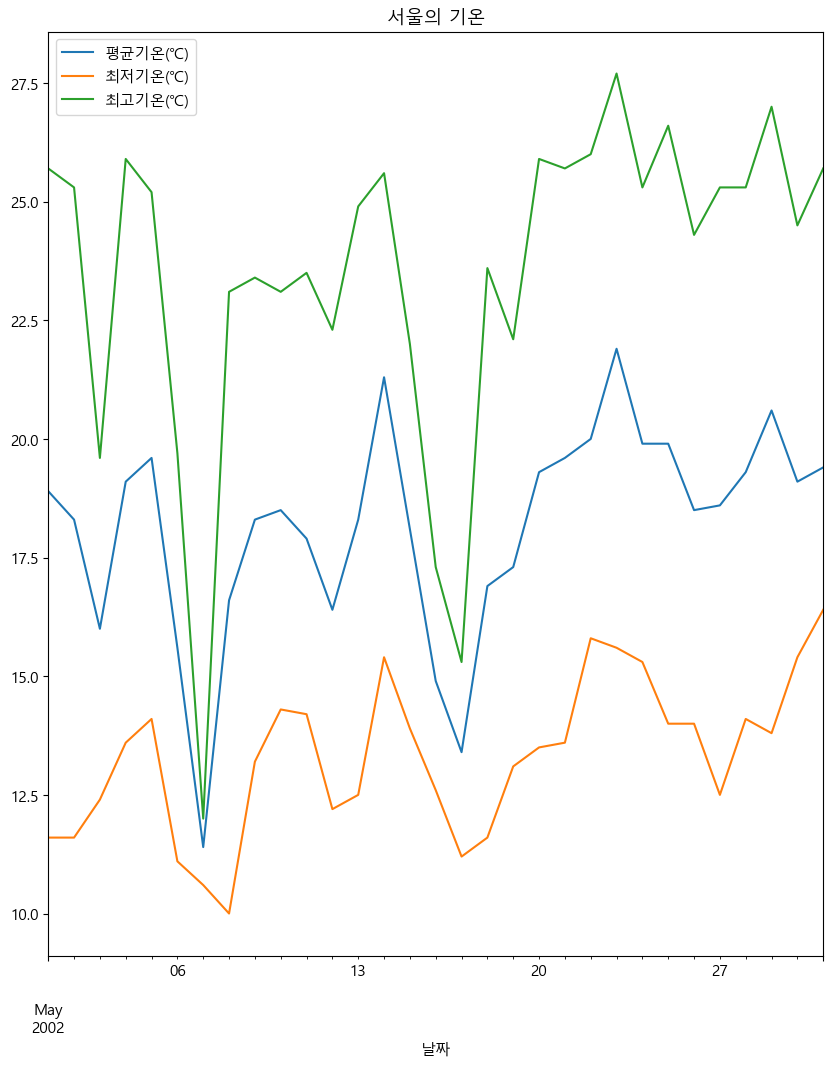

In [63]:
df_weather2.plot(figsize=(10,12), title='서울의 기온')

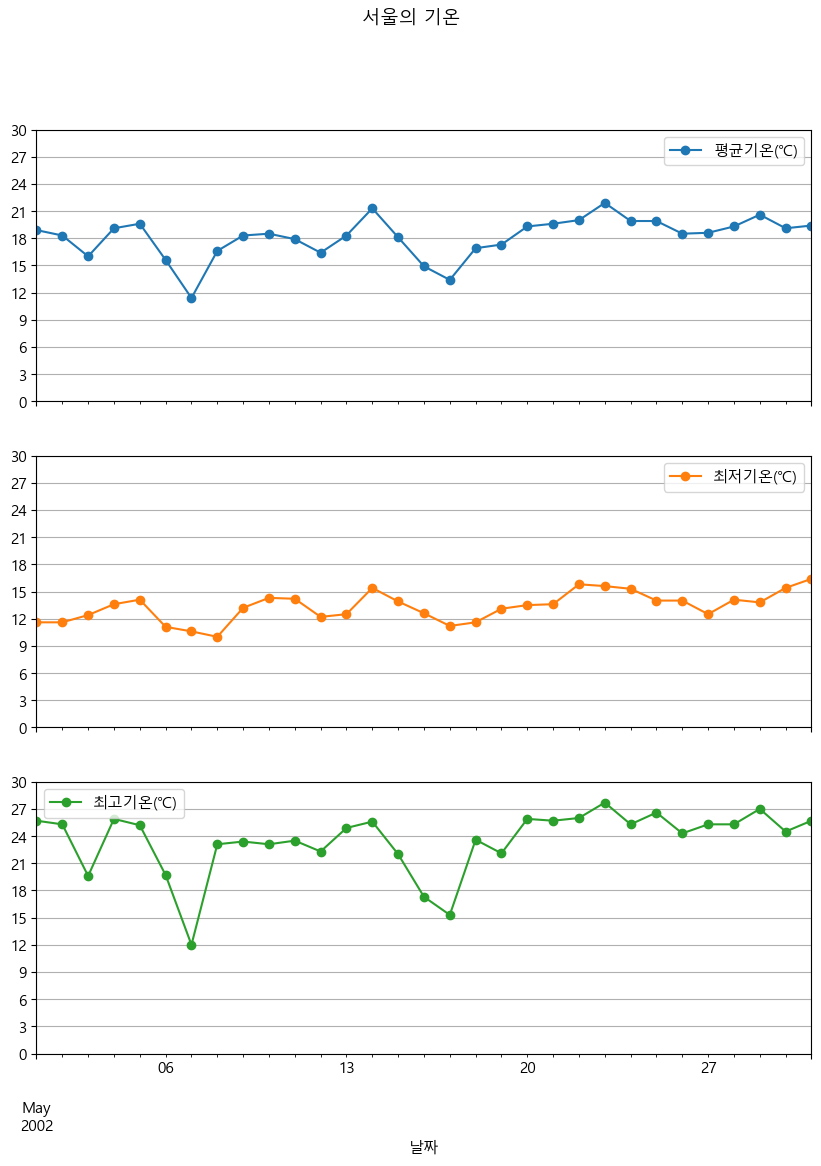

In [84]:
df_weather2.plot(figsize=(10,12), title='서울의 기온', subplots=True, grid=True, layout=(3,1), marker='o', yticks=np.arange(0,31,3))
# plt.ylim(0,40)
# plt.legend()
plt.show()